<a href="https://colab.research.google.com/github/virtualkushal/newfdsfinal/blob/main/fds_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Library Imports**  



In [45]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score,roc_curve

### **2. Dataset Loading**   

In [46]:
weather_df=pd.read_csv("https://raw.githubusercontent.com/virtualkushal/newfdsfinal/main/Weather%20Training%20Data.csv")
weather_df.head(3)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


- **2.1 Exploring Weather Data**

In [47]:
weather_df.shape

(99516, 23)

In [48]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [49]:
weather_df.isnull().sum()

,0
row ID,0
Location,0
MinTemp,443
MaxTemp,230
Rainfall,979
Evaporation,42531
Sunshine,47317
WindGustDir,6521
WindGustSpeed,6480
WindDir9am,7006


### **3. Data Preprocessing**  
   - **3.1 Cleaning and Preparing Weather Data**

In [50]:
updated_weather_df = weather_df
updated_weather_df = updated_weather_df.drop(['row ID'], axis = 1)
updated_weather_df['MinTemp']=updated_weather_df['MinTemp'].fillna(updated_weather_df['MinTemp'].mean())
updated_weather_df['MaxTemp']=updated_weather_df['MaxTemp'].fillna(updated_weather_df['MaxTemp'].mean())
updated_weather_df['Rainfall']=updated_weather_df['Rainfall'].fillna(updated_weather_df['Rainfall'].mean())
updated_weather_df['Evaporation']=updated_weather_df['Evaporation'].fillna(updated_weather_df['Evaporation'].mean())
updated_weather_df['Sunshine']=updated_weather_df['Sunshine'].fillna(updated_weather_df['Sunshine'].mean())
updated_weather_df['WindGustSpeed']=updated_weather_df['WindGustSpeed'].fillna(updated_weather_df['WindGustSpeed'].mean())
updated_weather_df['WindSpeed9am']=updated_weather_df['WindSpeed9am'].fillna(updated_weather_df['WindSpeed9am'].mean())
updated_weather_df['WindSpeed3pm']=updated_weather_df['WindSpeed3pm'].fillna(updated_weather_df['WindSpeed3pm'].mean())
updated_weather_df['Humidity9am']=updated_weather_df['Humidity9am'].fillna(updated_weather_df['Humidity9am'].mean())
updated_weather_df['Humidity3pm']=updated_weather_df['Humidity3pm'].fillna(updated_weather_df['Humidity3pm'].mean())
updated_weather_df['Pressure9am']=updated_weather_df['Pressure9am'].fillna(updated_weather_df['Pressure9am'].mean())
updated_weather_df['Pressure3pm']=updated_weather_df['Pressure3pm'].fillna(updated_weather_df['Pressure3pm'].mean())
updated_weather_df['Cloud9am']=updated_weather_df['Cloud9am'].fillna(updated_weather_df['Cloud9am'].mean())
updated_weather_df['Cloud3pm']=updated_weather_df['Cloud3pm'].fillna(updated_weather_df['Cloud3pm'].mean())
updated_weather_df['Temp9am']=updated_weather_df['Temp9am'].fillna(updated_weather_df['Temp9am'].mean())
updated_weather_df['Temp3pm']=updated_weather_df['Temp3pm'].fillna(updated_weather_df['Temp3pm'].mean())
print(updated_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [51]:
updated_weather_df['WindGustDir']=updated_weather_df['WindGustDir'].fillna(updated_weather_df['WindGustDir'].value_counts().idxmax())
updated_weather_df['WindDir9am']=updated_weather_df['WindDir9am'].fillna(updated_weather_df['WindDir9am'].value_counts().idxmax())
updated_weather_df['WindDir3pm']=updated_weather_df['WindDir3pm'].fillna(updated_weather_df['WindDir3pm'].value_counts().idxmax())
print(updated_weather_df.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [52]:
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].fillna(updated_weather_df['RainTomorrow'].shift())
print(updated_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [53]:
updated_weather_df.loc[updated_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_weather_df.loc[updated_weather_df.RainToday == "No", "RainToday"] = 0
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].astype(int)
updated_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


### **4. Exploratory Data Analysis (EDA)**  
   - **4.1 Visualizing Feature Distributions**

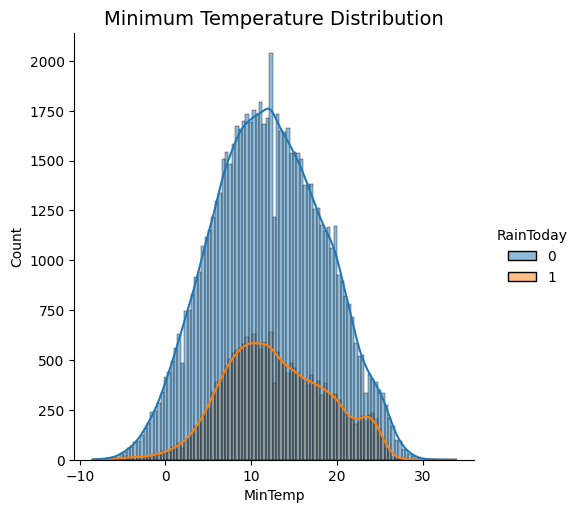

In [54]:
sns.displot(updated_weather_df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

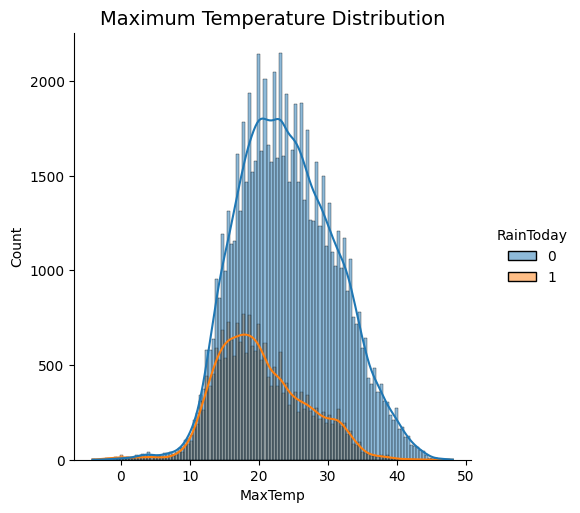

In [55]:
sns.displot(updated_weather_df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

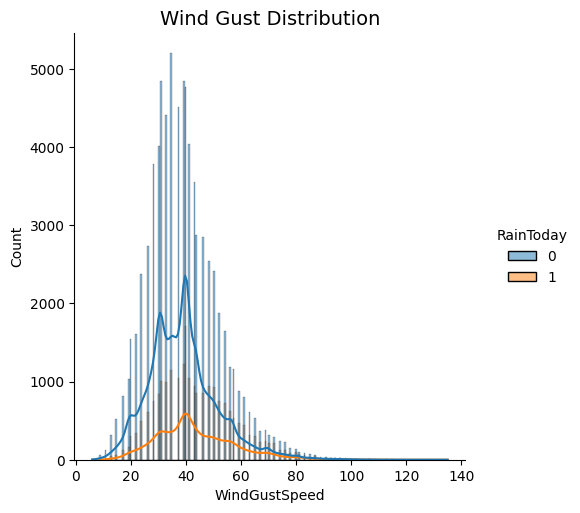

In [56]:
sns.displot(updated_weather_df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

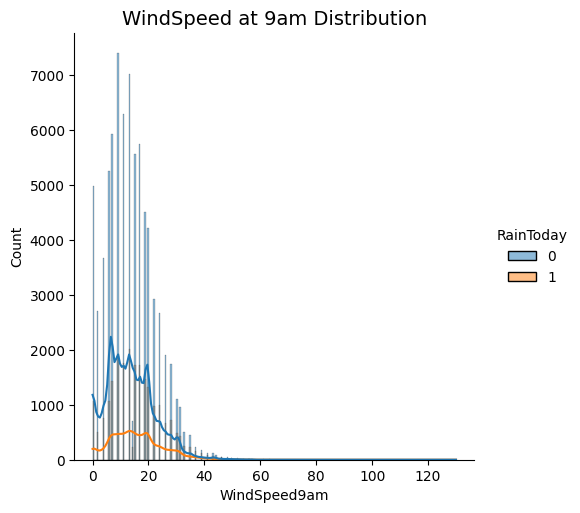

In [57]:
sns.displot(updated_weather_df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

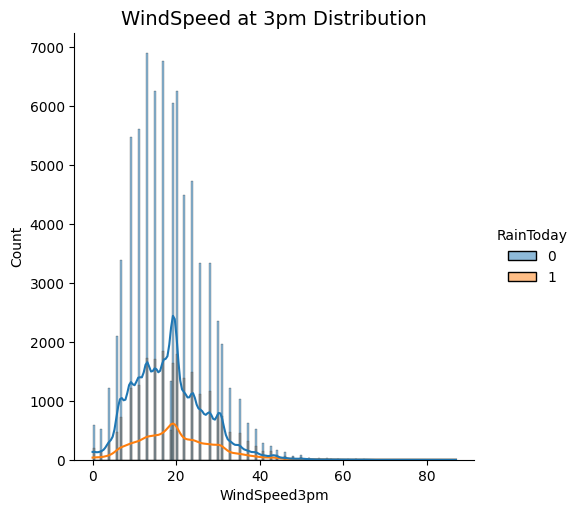

In [58]:
sns.displot(updated_weather_df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

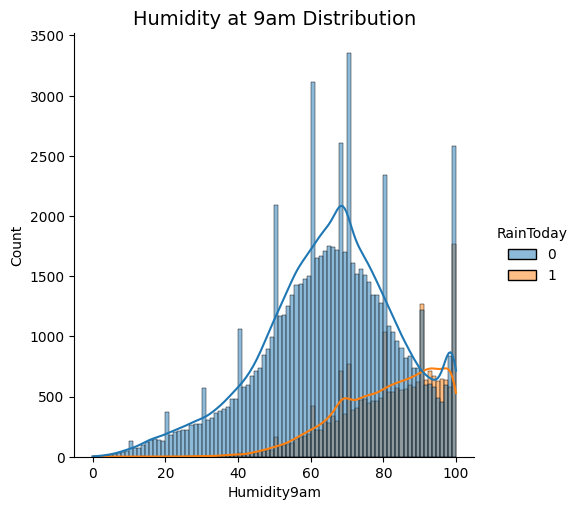

In [59]:
sns.displot(updated_weather_df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

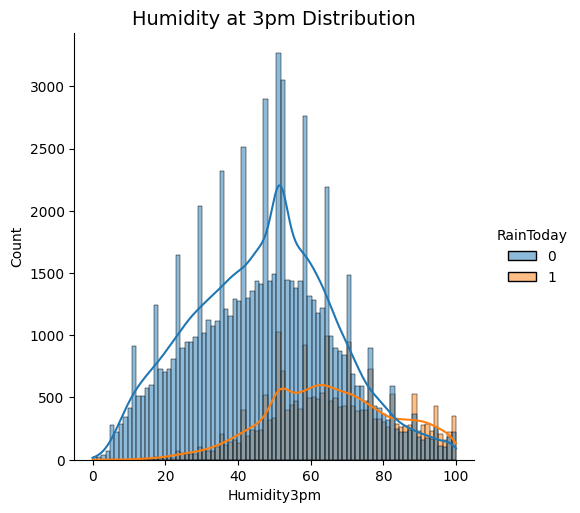

In [60]:
sns.displot(updated_weather_df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

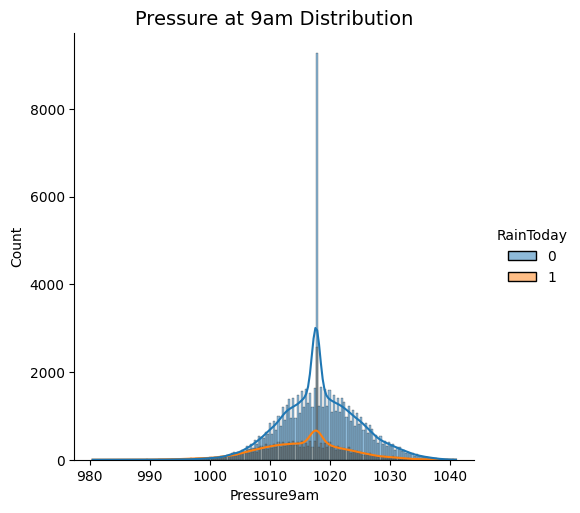

In [61]:
sns.displot(updated_weather_df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

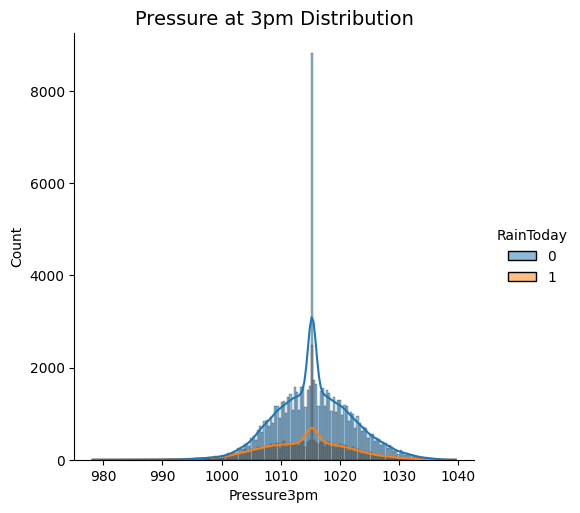

In [62]:
sns.displot(updated_weather_df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

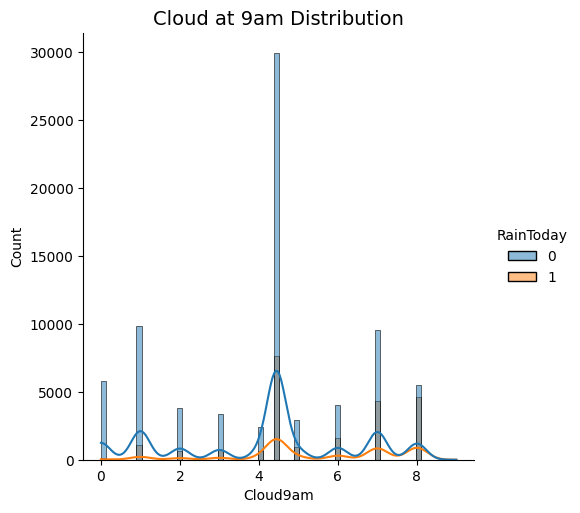

In [63]:
sns.displot(updated_weather_df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

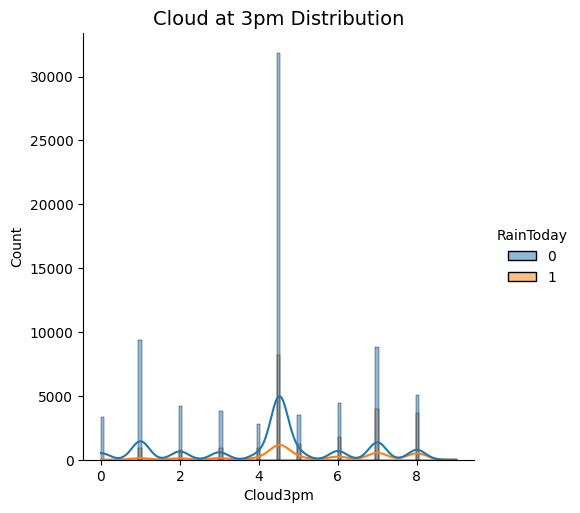

In [64]:
sns.displot(updated_weather_df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

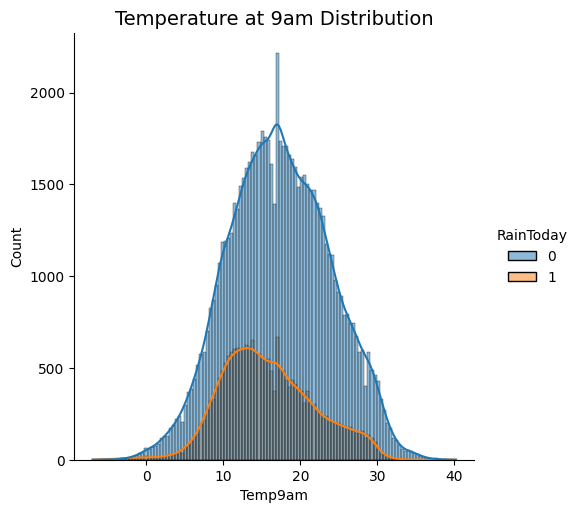

In [65]:
sns.displot(updated_weather_df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

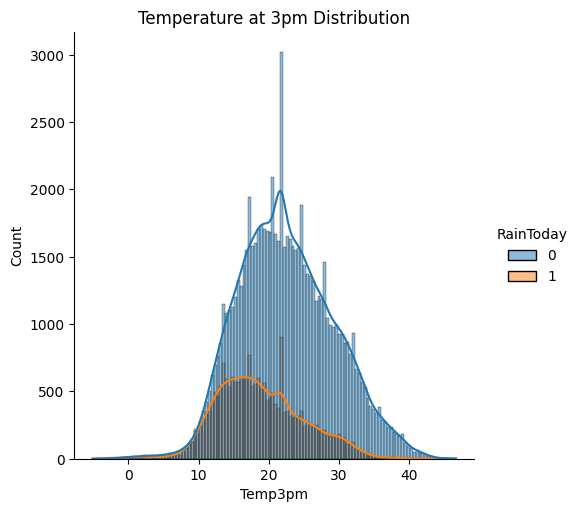

In [66]:
sns.displot(updated_weather_df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 12)
plt.show()

### **5. Predictive Analysis**  
   - **5.1 Feature Engineering & Transformation**  


In [67]:
number_df = updated_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
number_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [68]:
updated_weather_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,8.0,20.7,0.0,5.46132,7.61509,ESE,41.0,SE,E,...,56.0,32.0,1028.1,1024.3,4.447985,7.000000,11.6,20.0,0,0
99512,Uluru,3.5,21.8,0.0,5.46132,7.61509,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,4.447985,4.519122,9.4,20.9,0,0
99513,Uluru,2.8,23.4,0.0,5.46132,7.61509,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,4.447985,4.519122,10.1,22.4,0,0
99514,Uluru,3.6,25.3,0.0,5.46132,7.61509,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,4.447985,4.519122,10.9,24.5,0,0


In [69]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_original_hot = pd.get_dummies(updated_weather_df[column_names]).astype(int)
one_original_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


  - **5.2 One-Hot Encoding & Scaling**  

In [70]:
Complete_df = pd.concat([one_original_hot,number_df ],axis=1)
Complete_df.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,1,0,0,0,0,0,0,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,0,0,1,0,0,0,0,0,0,0,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,0,0,1,0,0,0,0,0,0,0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,0,0,1,0,0,0,0,0,0,0,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,0,0,1,0,0,0,0,0,0,0,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


   - **5.3 Feature Selection**  

In [71]:
weather_corr = Complete_df.corr()
weather_corr

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location_Adelaide,1.000000e+00,-0.021699,-0.022186,-0.022064,-2.164525e-02,-0.022080,-0.022016,-0.022501,-0.021968,-0.023480,...,-0.069318,-0.046847,0.022695,0.033266,1.408355e-15,2.600310e-16,-0.003199,-0.005046,0.001972,0.002247
Location_Albany,-2.169932e-02,1.000000,-0.021515,-0.021397,-2.099101e-02,-0.021412,-0.021350,-0.021821,-0.021304,-0.022770,...,0.044967,0.087637,0.014656,0.027913,4.586914e-02,2.008950e-02,-0.017138,-0.054604,0.030086,0.023417
Location_Albury,-2.218584e-02,-0.021515,1.000000,-0.021877,-2.146165e-02,-0.021892,-0.021829,-0.022310,-0.021782,-0.023281,...,0.042587,-0.024042,0.015318,0.010491,5.533776e-02,3.153824e-02,-0.061760,-0.009088,-0.004802,-0.006347
Location_AliceSprings,-2.206381e-02,-0.021397,-0.021877,1.000000,-2.134359e-02,-0.021772,-0.021709,-0.022188,-0.021662,-0.023153,...,-0.225582,-0.195055,-0.023459,-0.054651,-9.055041e-02,-7.675707e-02,0.100531,0.136948,-0.051175,-0.050883
Location_BadgerysCreek,-2.164525e-02,-0.020991,-0.021462,-0.021344,1.000000e+00,-0.021359,-0.021297,-0.021767,-0.021251,-0.022714,...,0.059622,-0.001880,0.018189,0.009818,-3.382347e-15,8.746863e-16,-0.009472,0.016388,-0.009389,-0.009949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud3pm,2.600310e-16,0.020090,0.031538,-0.076757,8.746863e-16,0.080810,0.018057,-0.046454,-0.005757,0.015274,...,0.271103,0.405447,-0.111252,-0.063256,5.609573e-01,1.000000e+00,-0.099920,-0.247921,0.210127,0.297873
Temp9am,-3.199312e-03,-0.017138,-0.061760,0.100531,-9.471938e-03,-0.121510,-0.073176,0.112318,0.199951,-0.104012,...,-0.473309,-0.218519,-0.400224,-0.444455,-1.119990e-01,-9.992044e-02,1.000000,0.847080,-0.094002,-0.024897
Temp3pm,-5.046342e-03,-0.054604,-0.009088,0.136948,1.638754e-02,-0.105615,-0.034576,0.066452,0.132614,-0.050139,...,-0.493856,-0.556328,-0.269420,-0.364024,-2.342595e-01,-2.479209e-01,0.847080,1.000000,-0.230064,-0.190104
RainToday,1.971965e-03,0.030086,-0.004802,-0.051175,-9.388962e-03,0.008094,-0.015672,0.002553,0.031706,-0.017652,...,0.347777,0.370462,-0.176419,-0.097644,2.434463e-01,2.101266e-01,-0.094002,-0.230064,1.000000,0.309025


In [72]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

,RainTomorrow
Rainfall,0.236476
Sunshine,0.326659
WindGustSpeed,0.225439
Humidity9am,0.254008
Humidity3pm,0.438649
Pressure9am,0.235220
Pressure3pm,0.215813
Cloud9am,0.252877
Cloud3pm,0.297873
RainToday,0.309025


In [73]:
Complete_weather_train_data = Complete_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
Complete_weather_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


In [74]:
newweather_corr = Complete_weather_train_data.corr()
newweather_corr

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
Rainfall,1.000000,-0.171406,0.127677,0.219696,0.248604,-0.158218,-0.118991,0.169552,0.142674,0.496571,0.236476
Sunshine,-0.171406,1.000000,-0.019216,-0.350935,-0.446119,0.028481,-0.016601,-0.536643,-0.558354,-0.238614,-0.326659
WindGustSpeed,0.127677,-0.019216,1.000000,-0.212783,-0.027646,-0.428431,-0.386838,0.050358,0.078678,0.146742,0.225439
Humidity9am,0.219696,-0.350935,-0.212783,1.000000,0.658556,0.134598,0.178967,0.352201,0.271103,0.347777,0.254008
Humidity3pm,0.248604,-0.446119,-0.027646,0.658556,1.000000,-0.022805,0.050791,0.397438,0.405447,0.370462,0.438649
Pressure9am,-0.158218,0.028481,-0.428431,0.134598,-0.022805,1.000000,0.960091,-0.099651,-0.111252,-0.176419,-0.235220
Pressure3pm,-0.118991,-0.016601,-0.386838,0.178967,0.050791,0.960091,1.000000,-0.045985,-0.063256,-0.097644,-0.215813
Cloud9am,0.169552,-0.536643,0.050358,0.352201,0.397438,-0.099651,-0.045985,1.000000,0.560957,0.243446,0.252877
Cloud3pm,0.142674,-0.558354,0.078678,0.271103,0.405447,-0.111252,-0.063256,0.560957,1.000000,0.210127,0.297873
RainToday,0.496571,-0.238614,0.146742,0.347777,0.370462,-0.176419,-0.097644,0.243446,0.210127,1.000000,0.309025


 - **5.4 Plotting the corellated values**



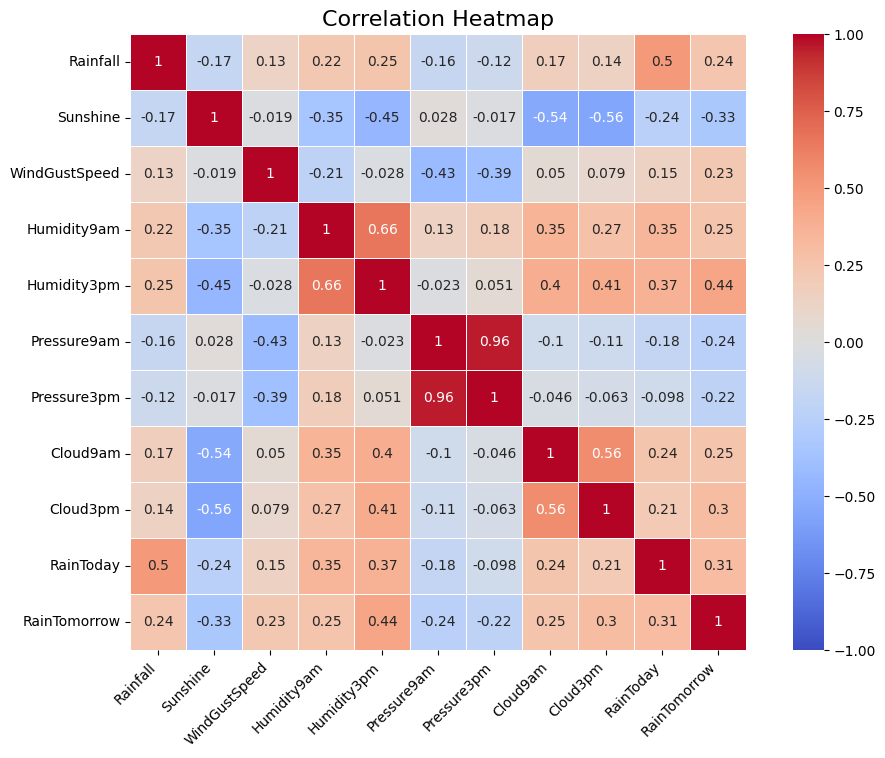

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(newweather_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

 - **5.4 Splitting Data for Training & Traning**

In [76]:
X = Complete_weather_train_data.drop(['RainTomorrow'], axis=1)
Y= Complete_weather_train_data['RainTomorrow']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)
X_new.shape


(99516, 10)

 - **5.4 Splitting Data for Training & Validation**

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, train_size=0.9, shuffle=True, random_state=44)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(89564, 10) (9952, 10) (89564,) (9952,)


### **6. Machine Learning Modeling**  
   - **6.1 Evaluating Model Performance**

In [86]:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_f1 = f1_score(Y_train, Y_train_pred)
    train_precision = precision_score(Y_train, Y_train_pred)
    train_recall = recall_score(Y_train, Y_train_pred)
    train_rocauc = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])

    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')
    test_precision = precision_score(Y_test, Y_test_pred, average='binary')
    test_recall = recall_score(Y_test, Y_test_pred, average='binary')
    test_rocauc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

    print(f"Model: {name}")
    print('Training set performance:')
    print(f"- Accuracy: {train_accuracy:.4f}")
    print(f"- F1 score: {train_f1:.4f}")
    print(f"- Precision: {train_precision:.4f}")
    print(f"- Recall: {train_recall:.4f}")
    print(f"- Roc Auc Score: {train_rocauc:.4f}")

    print('Test set performance:')
    print(f"- Accuracy: {test_accuracy:.4f}")
    print(f"- F1 score: {test_f1:.4f}")
    print(f"- Precision: {test_precision:.4f}")
    print(f"- Recall: {test_recall:.4f}")
    print(f"- Roc Auc Score: {test_rocauc:.4f}")
    print('='*35)
    print('\n')


Model: Random Forest
Training set performance:
- Accuracy: 0.9994
- F1 score: 0.9987
- Precision: 0.9992
- Recall: 0.9983
- Roc Auc Score: 0.9999
Test set performance:
- Accuracy: 0.8458
- F1 score: 0.8345
- Precision: 0.7246
- Recall: 0.4937
- Roc Auc Score: 0.8693


Model: KNN
Training set performance:
- Accuracy: 0.8724
- F1 score: 0.6780
- Precision: 0.7844
- Recall: 0.5970
- Roc Auc Score: 0.9265
Test set performance:
- Accuracy: 0.8290
- F1 score: 0.8203
- Precision: 0.6511
- Recall: 0.4968
- Roc Auc Score: 0.8114


Model: Logistic Regression
Training set performance:
- Accuracy: 0.8422
- F1 score: 0.5820
- Precision: 0.7198
- Recall: 0.4885
- Roc Auc Score: 0.8608
Test set performance:
- Accuracy: 0.8399
- F1 score: 0.8291
- Precision: 0.6998
- Recall: 0.4901
- Roc Auc Score: 0.8640




 - **6.2 Slecting Best Model Based on Evaluations**

In [80]:
import joblib
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

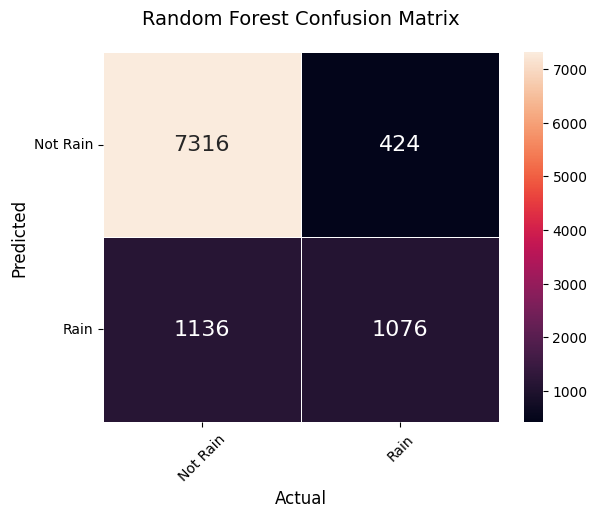

In [87]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

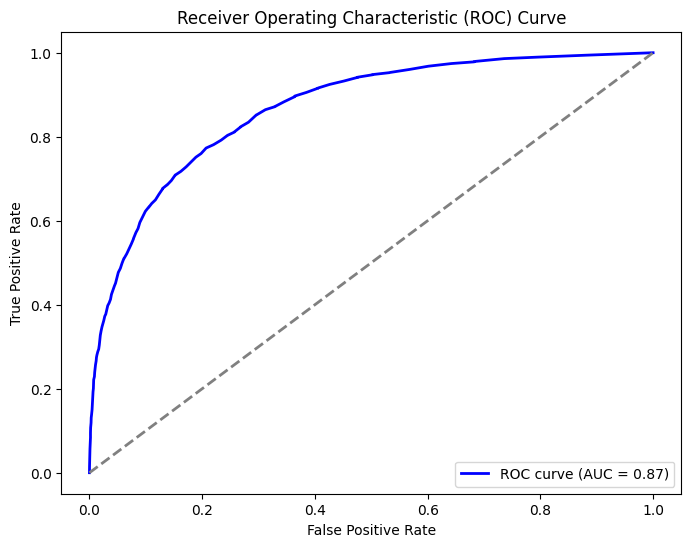

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
Y_test_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
def predict_rain_tomorrow():
    model = joblib.load('random_forest_model.pkl')

    print("Please enter the following weather features:")
    rainfall = float(input("Rainfall (mm): "))
    sunshine = float(input("Sunshine (hours): "))
    wind_gust_speed = float(input("Wind Gust Speed (km/h): "))
    humidity_9am = float(input("Humidity at 9am (%): "))
    humidity_3pm = float(input("Humidity at 3pm (%): "))
    pressure_9am = float(input("Pressure at 9am (hPa): "))
    pressure_3pm = float(input("Pressure at 3pm (hPa): "))
    cloud_9am = float(input("Cloud at 9am (oktas): "))
    cloud_3pm = float(input("Cloud at 3pm (oktas): "))
    rain_today = int(input("Rain Today (1 for Yes, 0 for No): "))

    input_data = pd.DataFrame({
        'Rainfall': [rainfall],
        'Sunshine': [sunshine],
        'WindGustSpeed': [wind_gust_speed],
        'Humidity9am': [humidity_9am],
        'Humidity3pm': [humidity_3pm],
        'Pressure9am': [pressure_9am],
        'Pressure3pm': [pressure_3pm],
        'Cloud9am': [cloud_9am],
        'Cloud3pm': [cloud_3pm],
        'RainToday': [rain_today]
    })

    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)

    if prediction[0] == 1:
        print("It is likely to rain tomorrow.")
    else:
        print("It is not likely to rain tomorrow.")

predict_rain_tomorrow()


Please enter the following weather features:
Rainfall (mm): 20
Sunshine (hours): 45
Wind Gust Speed (km/h): 17
Humidity at 9am (%): 19
Humidity at 3pm (%): 18
Pressure at 9am (hPa): 40
Pressure at 3pm (hPa): 16
Cloud at 9am (oktas): 17
Cloud at 3pm (oktas): 48
Rain Today (1 for Yes, 0 for No): 1
It is not likely to rain tomorrow.
